In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fresno = "Resources/fresno.csv"

In [3]:
fresno = pd.read_csv(fresno, delimiter = ", ")
fresno[["Year", "Month", "Day"]]=fresno["date"].str.split("/", n=2, expand=True)
fresno.drop(columns=["date"], inplace=True)
fresno["Year"]=fresno["Year"].astype(int)
fresno["Month"]=fresno["Month"].astype(int)
#fresno=fresno[fresno["Year"]>2017]
fresno=fresno[fresno["Month"]<8]
bins_df = fresno.dropna(subset = ['pm25'])
bins_df

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,pm25,pm10,o3,no2,so2,co,Year,Month,Day
0,30.0,34.0,46.0,2.0,2,1.0,2020,7,2
1,33.0,31.0,47.0,3.0,2,1.0,2020,7,3
2,32.0,30.0,50.0,2.0,2,1.0,2020,7,4
3,49.0,25.0,38.0,2.0,1,1.0,2020,7,5
4,45.0,37.0,48.0,2.0,1,2.0,2020,7,6
...,...,...,...,...,...,...,...,...,...
2361,21.0,16.0,34.0,13.0,",",NaN,2014,3,28
2362,35.0,18.0,35.0,9.0,",",NaN,2014,3,29
2363,34.0,4.0,34.0,4.0,",",NaN,2014,3,30
2364,19.0,10.0,33.0,6.0,",",NaN,2014,3,31


In [4]:
AQI2018 = []
for value in bins_df["pm25"]:
    if value >= 0 and value <= 12:
        AQI2018.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2018.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2018.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2018.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2018.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2018.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2018.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2018.append("invalid")
AQI2018 = [round(i,1) for i in AQI2018]
bins_df["AQI"] = AQI2018

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
bins = [0, 50, 100, 150, 200, 300, 500]
quality = ["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"]

bins_df["Levels of Concern"]=pd.cut(bins_df["pm25"], bins, labels = quality, include_lowest = True)
bins_df.drop(columns = ["pm25", "pm10", "o3", "no2", "so2", "co"], inplace = True)
bins_df

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,Day,AQI,Levels of Concern
0,2020,7,2,88.6,Good
1,2020,7,3,95.0,Good
2,2020,7,4,92.8,Good
3,2020,7,5,134.2,Good
4,2020,7,6,124.4,Good
...,...,...,...,...,...
2361,2014,3,28,69.7,Good
2362,2014,3,29,99.2,Good
2363,2014,3,30,97.1,Good
2364,2014,3,31,65.5,Good


In [6]:
Fres_agg = bins_df.groupby(["Year","Month"]).agg({"AQI":["min","max","mean"]})
fres_months = Fres_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
fres_months

AQI                   
              min    max        mean
Year Month                          
2014 Jan    156.4  223.3  187.450000
     Feb     69.7  185.8  136.503571
     Mar     52.9  154.4  103.429032
     Apr     59.2  152.8  108.720000
     May     52.9  146.6   93.567742
     June    67.6  153.8  110.296667
     Jul     76.0  159.5  123.235484
2015 Jan    119.5  204.5  169.066667
     Feb     71.8  175.5  140.032143
     Mar     59.2  154.4  104.383871
     Apr     65.5  151.3  103.030000
     May     76.0  136.7  100.535484
     June    57.1  152.3  104.790000
     Jul     67.6  152.3  103.003226
2016 Jan     61.3  181.2  131.886667
     Feb     61.3  183.8  142.162069
     Mar     50.0  156.9   98.862069
     Apr     33.3  160.0   90.340000
     May     33.3  129.3   83.464516
     June    50.0  119.5   82.233333
     Jul     29.2  155.9   92.425806
2017 Jan     37.5  176.5  108.403846
     Feb     29.2  179.1   99.439286
     Mar     50.0  161.6  108.217241
     Apr     33.3  146.6   81.030000
     May     57.1  144.1   98.732258
     June    41.7  146.6   86.123333
     Jul     80.2  144.1  110.706452
2018 Jan     73.9  222.3  152.470968
     Feb     67.6  195.6  140.021429
     Mar     37.5  149.0   88.861290
     Apr     52.9  144.1   93.876667
     May     55.0  131.8   87.738710
     June    59.2  131.8   99.050000
     Jul     69.7  180.7  125.480645
2019 Jan     59.2  185.3  128.840000
     Feb     33.3  159.0   95.753571
     Mar     33.3  126.9   80.406452
     Apr     41.7  146.6   91.720000
     May     29.2  141.6   81.287097
     June    61.3  152.3  101.165517
     Jul     57.1  156.9   97.190323
2020 Jan     86.5  177.6  142.230000
     Feb     73.9  177.0  143.768966
     Mar     25.0  149.0   82.212903
     Apr     45.8  152.3   83.933333
     May     52.9  151.3   81.382759
     June    45.8  134.2   88.000000
     Jul     73.9  151.8   95.358333

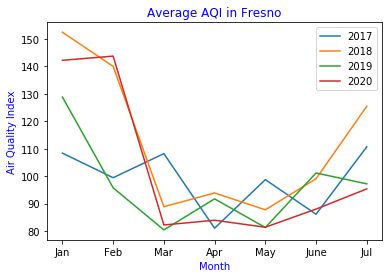

In [7]:
ax1 = fres_months["AQI"]["mean"].loc[2017].plot.line(label=2017)
ax2 = fres_months["AQI"]["mean"].loc[2018].plot.line(label=2018)
ax3 = fres_months["AQI"]["mean"].loc[2019].plot.line(label=2019)
ax4 = fres_months["AQI"]["mean"].loc[2020].plot.line(label=2020)
plt.title("Average AQI in Fresno", color = "blue")
plt.ylabel("Air Quality Index", color = "blue")
plt.xlabel("Month", color = "blue")
plt.legend()
plt.show()

In [10]:
fres_months_df = bins_df.groupby(["Year","Month"]).mean()
fres_months_df["AQI"] = round(fres_months_df["AQI"])
fres_months_df

AQI
Year Month       
2014 1      187.0
     2      137.0
     3      103.0
     4      109.0
     5       94.0
     6      110.0
     7      123.0
2015 1      169.0
     2      140.0
     3      104.0
     4      103.0
     5      101.0
     6      105.0
     7      103.0
2016 1      132.0
     2      142.0
     3       99.0
     4       90.0
     5       83.0
     6       82.0
     7       92.0
2017 1      108.0
     2       99.0
     3      108.0
     4       81.0
     5       99.0
     6       86.0
     7      111.0
2018 1      152.0
     2      140.0
     3       89.0
     4       94.0
     5       88.0
     6       99.0
     7      125.0
2019 1      129.0
     2       96.0
     3       80.0
     4       92.0
     5       81.0
     6      101.0
     7       97.0
2020 1      142.0
     2      144.0
     3       82.0
     4       84.0
     5       81.0
     6       88.0
     7       95.0

In [11]:
pwd

'/Users/gagethompson/Desktop/HOMEWORK/project-one'

In [12]:
fres_months_df.to_csv("project_one_csv/fresno_months.csv")